## Importações 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataframe
df = pd.read_csv('C:\\Users\\souza\\Downloads\\projeto - Risco de crédito desenrola\\data\\dados_desenrola (2).csv', delimiter=';')
df

,DATA_BASE,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
0,202309,2,AC,49906,BB,142,"1421991,10"
1,202309,2,AC,10045,BRADESCO,17,"94097,52"
2,202309,2,AC,49944,BTG PACTUAL,7,"37788,79"
3,202309,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
4,202309,2,AC,51884,INTER,4,"12306,86"
...,...,...,...,...,...,...,...
7843,202502,3,RJ,80185,SANTANDER - PRUDENCIAL,12,"403555,07"
7844,202502,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,"17259,94"
7845,202502,3,RS,80185,SANTANDER - PRUDENCIAL,7,"168618,00"
7846,202502,3,SC,80185,SANTANDER - PRUDENCIAL,1,"23834,66"


## Analise descritiva e tratamento de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DATA_BASE                     7848 non-null   int64 
 1   TIPO_DESENROLA                7848 non-null   int64 
 2   UNIDADE_FEDERACAO             7848 non-null   object
 3   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64 
 4   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object
 5   NUMERO_OPERACOES              7848 non-null   int64 
 6   VOLUME_OPERACOES              7848 non-null   object
dtypes: int64(4), object(3)
memory usage: 429.3+ KB


In [4]:
#verificar media, mediana, desvio padrao e etc 
df.describe()

,DATA_BASE,TIPO_DESENROLA,COD_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES
count,7848.000000,7848.000000,7.848000e+03,7848.000000
mean,202385.877676,1.497706,1.323293e+06,318.405581
std,52.846366,0.679579,8.231551e+06,1361.666387
min,202309.000000,1.000000,1.004500e+04,1.000000
25%,202312.000000,1.000000,3.029000e+04,3.000000
50%,202404.000000,1.000000,4.994400e+04,19.000000
75%,202408.000000,2.000000,5.188400e+04,147.000000
max,202502.000000,3.000000,8.682983e+07,46456.000000


In [5]:
#verificar se há dados nulos 
df.isnull().sum()

DATA_BASE                       0
TIPO_DESENROLA                  0
UNIDADE_FEDERACAO               0
COD_CONGLOMERADO_FINANCEIRO     0
NOME_CONGLOMERADO_FINANCEIRO    0
NUMERO_OPERACOES                0
VOLUME_OPERACOES                0
dtype: int64

In [6]:
#verificar se há dados duplicados 
df.duplicated().sum()

0

In [7]:
#criando uma cópia do df 
df2 = df.copy()

In [8]:
#convertendo coluna DATA_BASE para data 
df2['DATA_BASE'] = pd.to_datetime(df2['DATA_BASE'], format='%Y%m', errors='coerce')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATA_BASE                     7848 non-null   datetime64[ns]
 1   TIPO_DESENROLA                7848 non-null   int64         
 2   UNIDADE_FEDERACAO             7848 non-null   object        
 3   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64         
 4   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object        
 5   NUMERO_OPERACOES              7848 non-null   int64         
 6   VOLUME_OPERACOES              7848 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 429.3+ KB


In [10]:
#setando data como index 
df2 = df2.set_index('DATA_BASE')
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,"1421991,10"
2023-09-01,2,AC,10045,BRADESCO,17,"94097,52"
2023-09-01,2,AC,49944,BTG PACTUAL,7,"37788,79"
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
2023-09-01,2,AC,51884,INTER,4,"12306,86"
...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,"403555,07"
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,"17259,94"
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,"168618,00"


In [11]:
#transformando coluna VOLUME_OPERACOES em float 
df2['VOLUME_OPERACOES'] = df2['VOLUME_OPERACOES'].str.replace(',', '.').str.strip()
df2['VOLUME_OPERACOES'] = pd.to_numeric(df2['VOLUME_OPERACOES'], errors='coerce')

In [12]:
#df2['COD_CONGLOMERADO_FINANCEIRO'] = df2['COD_CONGLOMERADO_FINANCEIRO'].astype('float')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7848 entries, 2023-09-01 to 2025-02-01
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TIPO_DESENROLA                7848 non-null   int64  
 1   UNIDADE_FEDERACAO             7848 non-null   object 
 2   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64  
 3   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object 
 4   NUMERO_OPERACOES              7848 non-null   int64  
 5   VOLUME_OPERACOES              7848 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 429.2+ KB


In [14]:
df2.head(5)

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10
2023-09-01,2,AC,10045,BRADESCO,17,94097.52
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66
2023-09-01,2,AC,51884,INTER,4,12306.86


In [47]:
some_columns = ['NUMERO_OPERACOES', 'VOLUME_OPERACOES']
for some in some_columns:
    mean = df2[some].mean()
    std = df2[some].std()
    median = df2[some].median()
    
    results = {'nome_coluna':some,
        'média':mean,
            'desvio_padrao':std,
            'median':median
        }
    print(results)

{'nome_coluna': 'NUMERO_OPERACOES', 'média': 318.40558103975536, 'desvio_padrao': 1361.6663869355068, 'median': 19.0}
{'nome_coluna': 'VOLUME_OPERACOES', 'média': 825362.3613302752, 'desvio_padrao': 5118237.34420361, 'median': 40955.03999999999}


A coluna VOLUME_OPERACOES possui um desvio padrao altissimo e sua média tambem é bem alta. Provavelmente estamos trabalhando com outliers

## Analise Univariada

In [15]:
#separaçao de tipos de colunas 
num_col = df2.select_dtypes(exclude='object')
cat_col = df2.select_dtypes(exclude='number').columns

In [16]:
cat_col

Index(['UNIDADE_FEDERACAO', 'NOME_CONGLOMERADO_FINANCEIRO'], dtype='object')

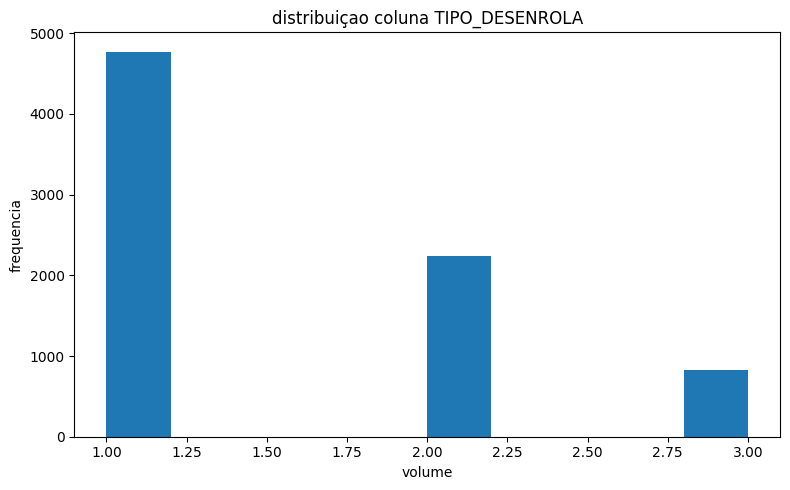

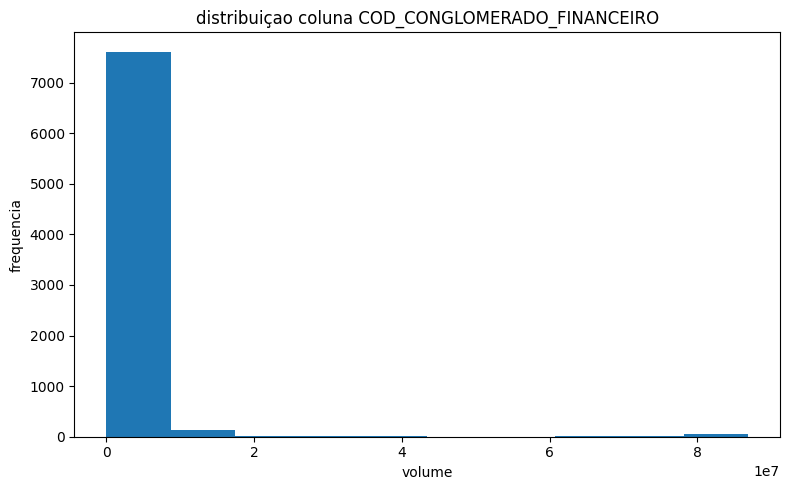

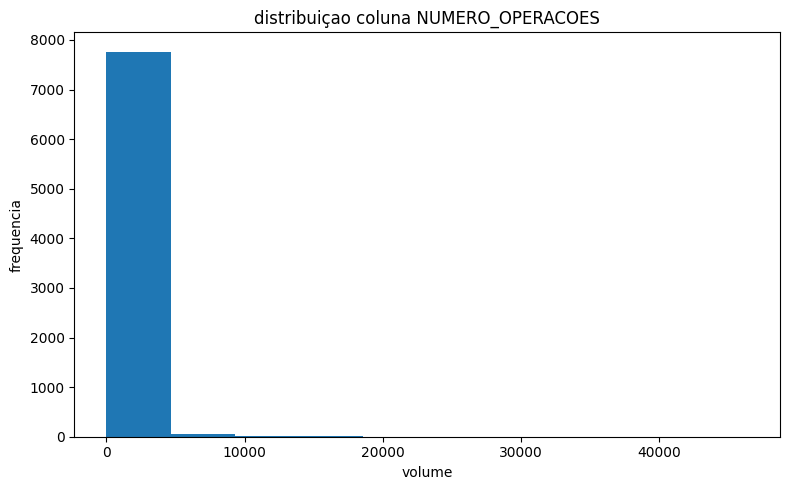

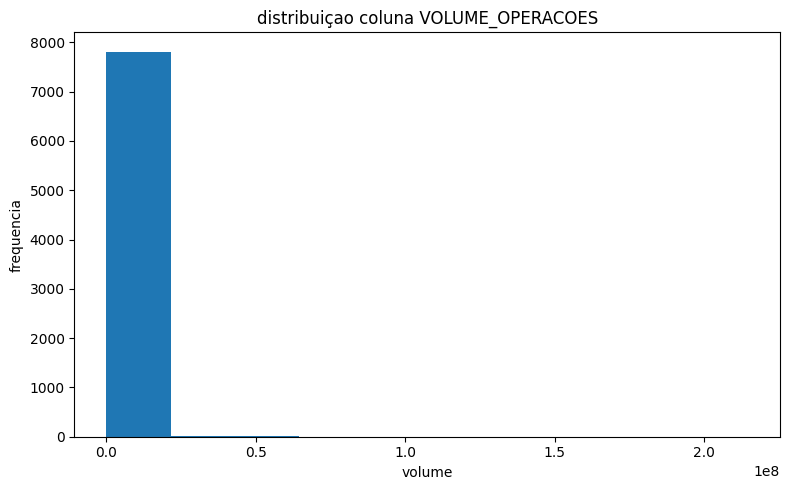

In [17]:
#distribuiçao variaveis numericas 
for i, num in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'distribuiçao coluna {num}')
    plt.hist(df2[num], bins=10)
    plt.xlabel('volume')
    plt.ylabel('frequencia')
    plt.tight_layout()
    plt.show()

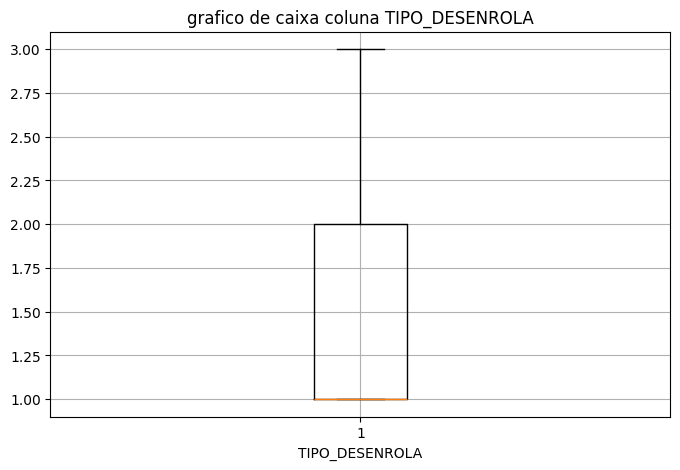

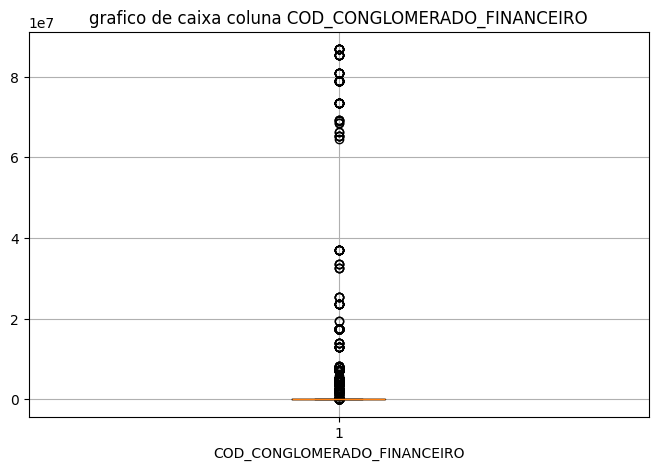

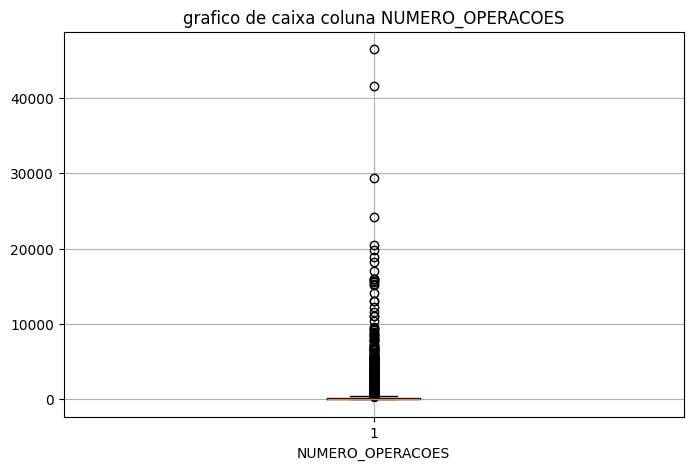

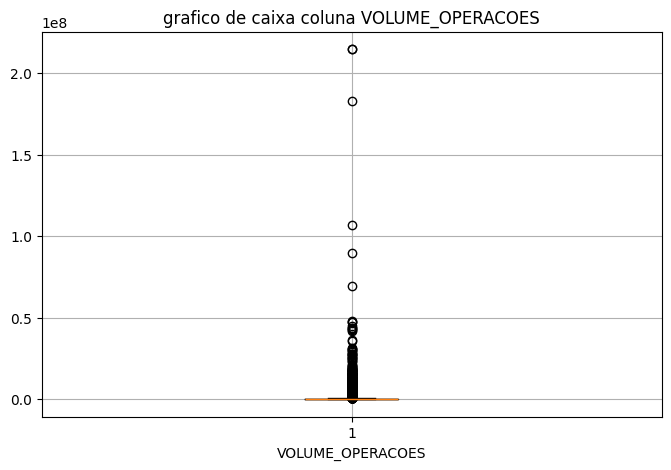

In [18]:
#grafico de caixa dados numericos 
for i, box in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'grafico de caixa coluna {box}')
    plt.boxplot(df2[box], vert=True)
    plt.xlabel(box)
    plt.grid()
    plt.show()

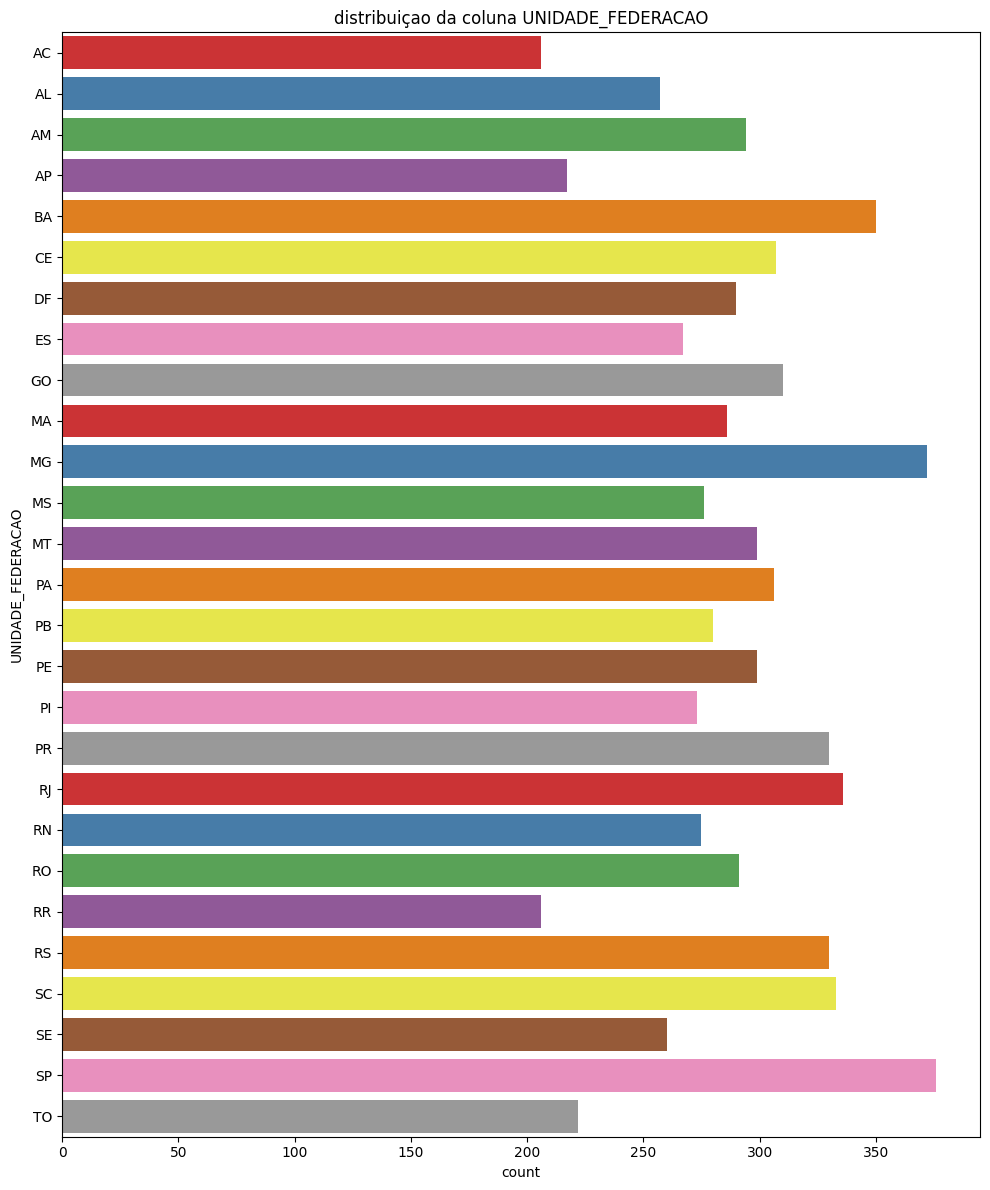

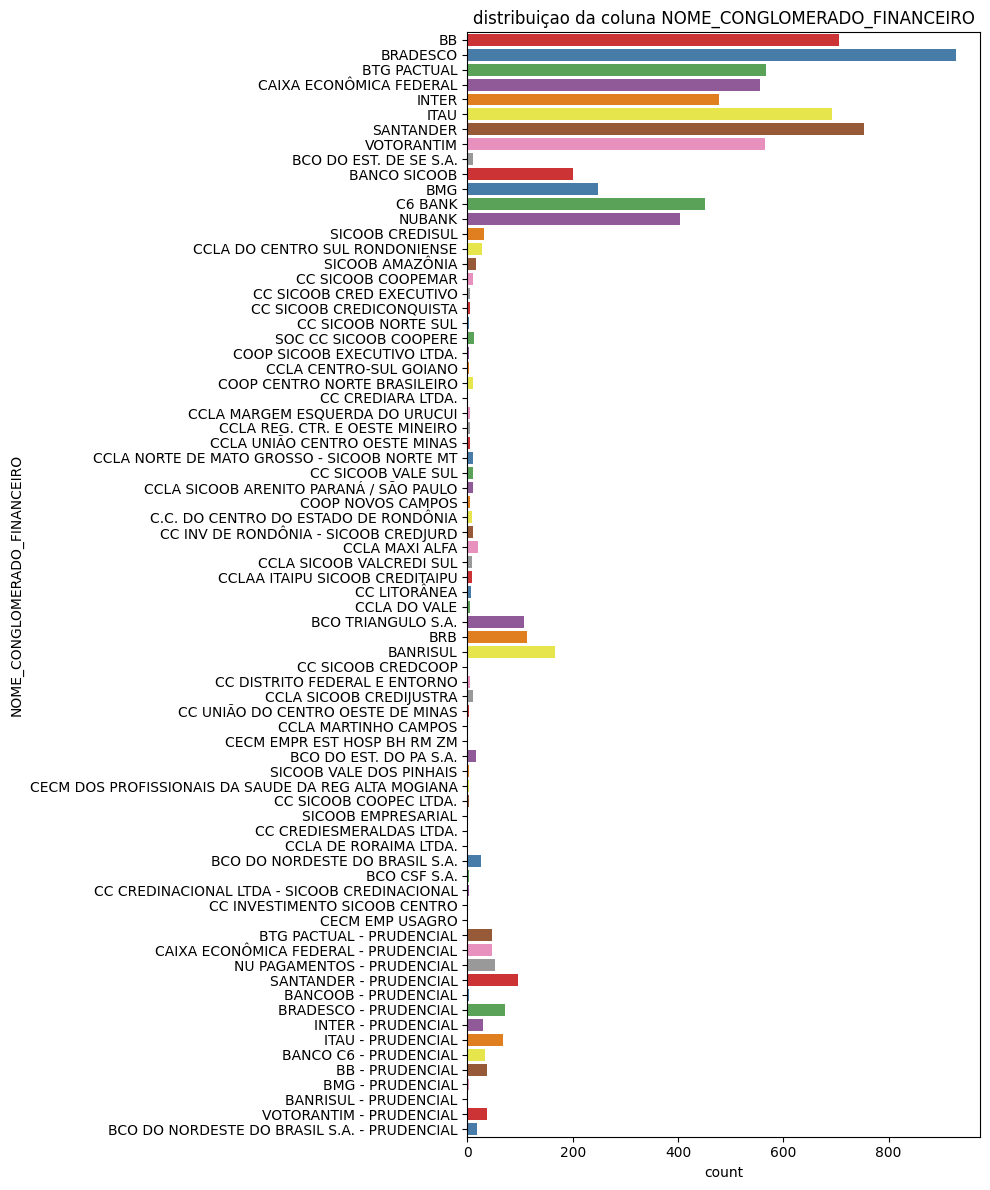

In [19]:
for i, cat in enumerate(cat_col):
    plt.figure(figsize=(10,12))
    plt.title(f'distribuiçao da coluna {cat}')
    sns.countplot(data=df2, y=cat, palette='Set1')
    plt.tight_layout()
    plt.show()

Perguntas de negocio 

In [20]:
cat_col

Index(['UNIDADE_FEDERACAO', 'NOME_CONGLOMERADO_FINANCEIRO'], dtype='object')

In [21]:
num_col.columns

Index(['TIPO_DESENROLA', 'COD_CONGLOMERADO_FINANCEIRO', 'NUMERO_OPERACOES',
       'VOLUME_OPERACOES'],
      dtype='object')

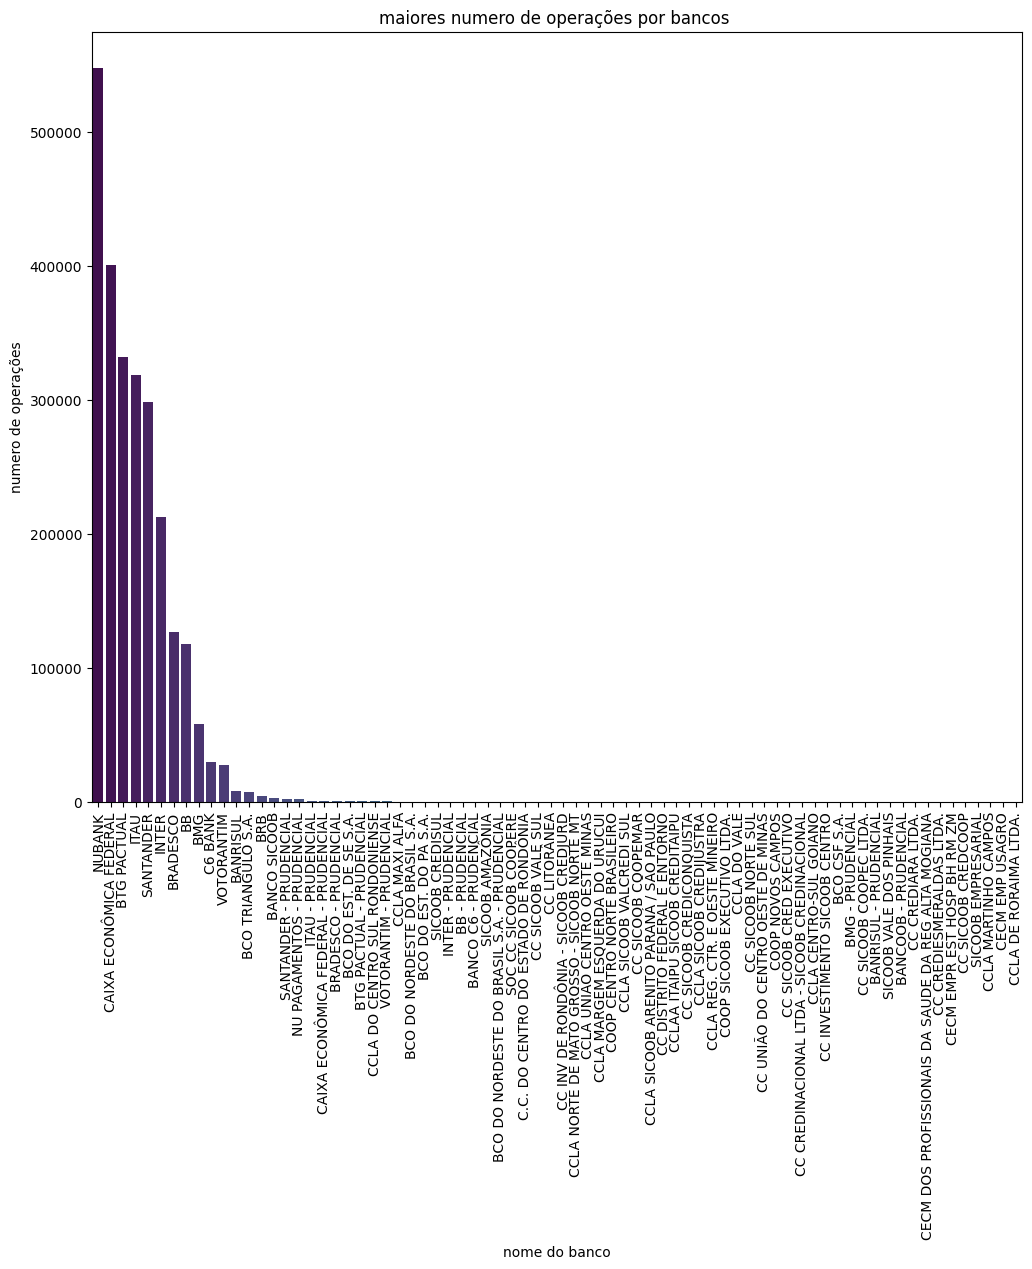

In [22]:
#bancos que mais realizaram operações 
group_bank = df2.groupby('NOME_CONGLOMERADO_FINANCEIRO')['NUMERO_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('maiores numero de operações por bancos ')
sns.barplot(group_bank, palette='viridis')
plt.xlabel('nome do banco')
plt.ylabel('numero de operações')
plt.xticks(rotation=(90))
plt.show()

In [23]:
#top 5 bancos que mais realizaram operações no desenrola brasil 
group_bank.head(5)

NOME_CONGLOMERADO_FINANCEIRO
NUBANK                     547423
CAIXA ECONÔMICA FEDERAL    400810
BTG PACTUAL                332136
ITAU                       318524
SANTANDER                  298376
Name: NUMERO_OPERACOES, dtype: int64

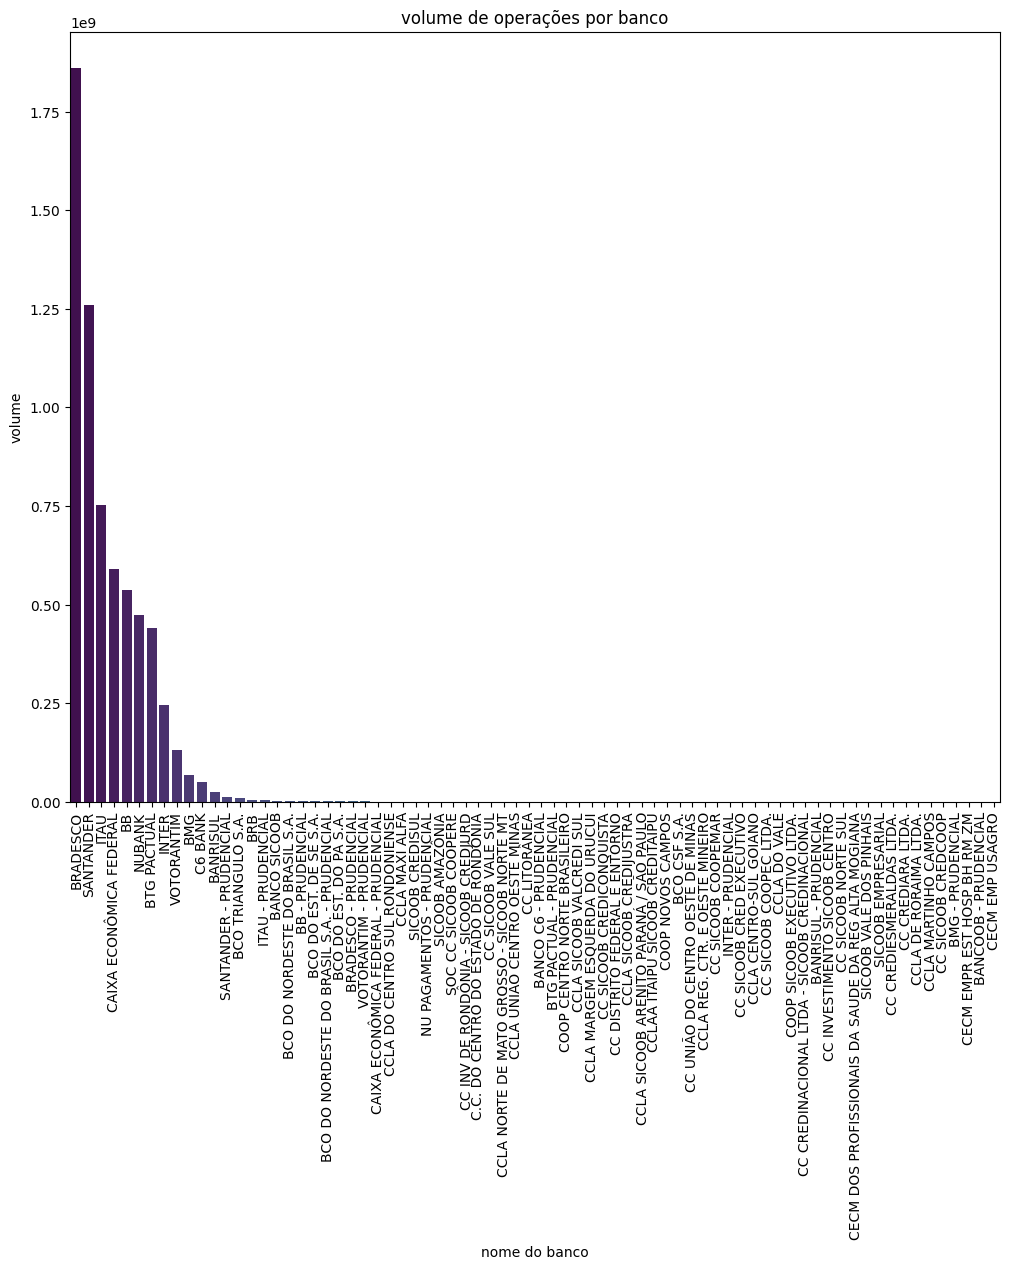

In [24]:
#bancos com maior volume de transações
bank_volumn = df2.groupby('NOME_CONGLOMERADO_FINANCEIRO')['VOLUME_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('volume de operações por banco')
sns.barplot(bank_volumn, palette='viridis')
plt.xlabel('nome do banco')
plt.ylabel('volume')
plt.xticks(rotation=90)
plt.show()

O Bradesco teve o maior volume de operações entre todos os bancos, de forma isolada.

Em seguida, temos o Santander, o Itaú e a Caixa Econômica Federal.

**Estados com maior volume de operações**


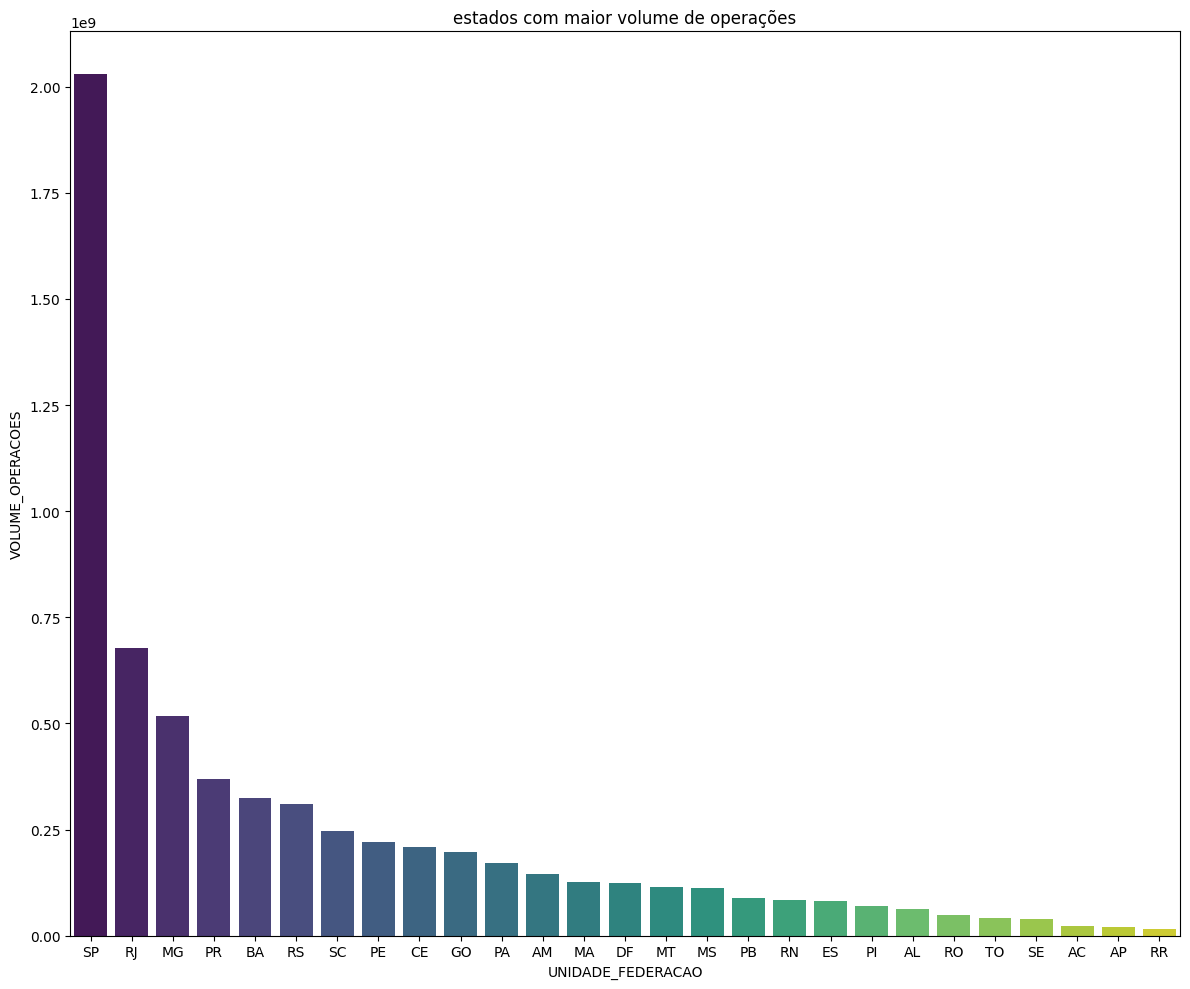

In [49]:
volumn_per_state = df2.groupby('UNIDADE_FEDERACAO')['VOLUME_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('estados com maior volume de operações')
sns.barplot(volumn_per_state, palette ='viridis')
plt.tight_layout()
plt.show()



São Paulo possui o maior volume de operações entre os estados

 **Nessa parte do projeto, vou buscar explorar os tipos de Desenrola e como eles estao distribuidos entre estados, volume, média e etc**

Tipo desenrola por banco 

In [26]:
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10
2023-09-01,2,AC,10045,BRADESCO,17,94097.52
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66
2023-09-01,2,AC,51884,INTER,4,12306.86
...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,403555.07
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,17259.94
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,168618.00


Qual é a distribuiçao dos bancos em relaçao ao numero de operaçoes e tipo de desenrola? 

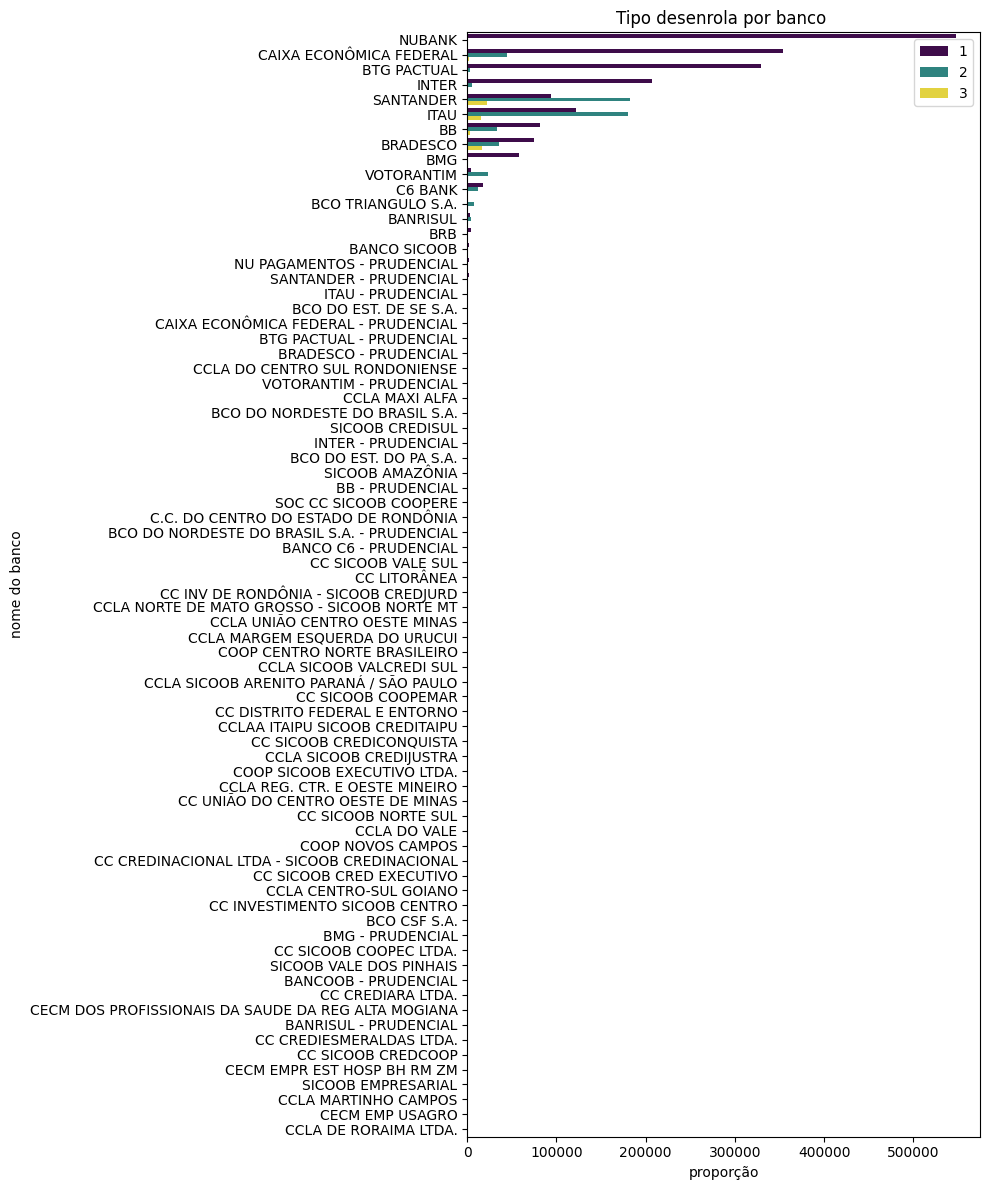

In [51]:
bank_per_operations = df2.groupby(['NOME_CONGLOMERADO_FINANCEIRO', 'TIPO_DESENROLA'])['NUMERO_OPERACOES'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,12))
plt.title('Tipo desenrola por banco ')
sns.barplot(data=bank_per_operations, y='NOME_CONGLOMERADO_FINANCEIRO', x='NUMERO_OPERACOES', hue='TIPO_DESENROLA', palette='viridis')
#sns.countplot(data=df2, y=df2['NOME_CONGLOMERADO_FINANCEIRO'],hue='TIPO_DESENROLA', palette='viridis')
plt.ylabel('nome do banco')
plt.xlabel('proporção')
plt.tight_layout()
plt.legend()
plt.show()

Um ponto a se destacar é que o nubank realizou somente transaçoes do tipo 1 

O tipo de desenrola tem impacto no volume de operaçoes?


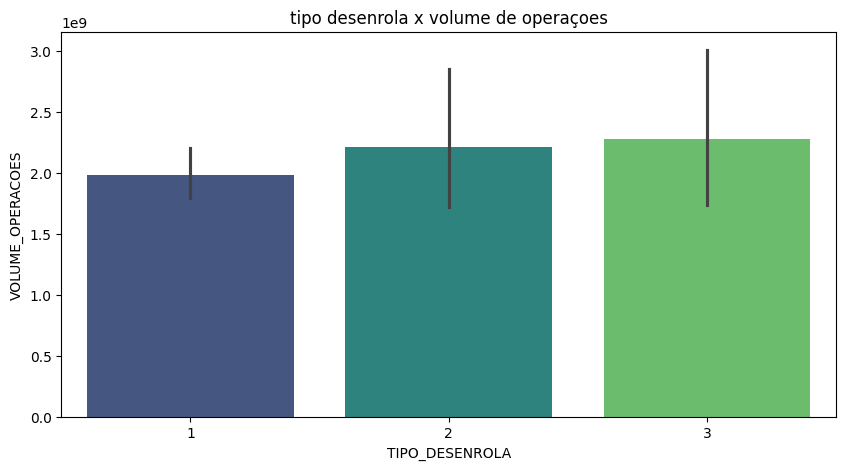

In [28]:
plt.figure(figsize=(10,5))
plt.title('tipo desenrola x volume de operaçoes')
sns.barplot(data=df2, x='TIPO_DESENROLA', y='VOLUME_OPERACOES', palette='viridis', estimator=sum)
plt.show()

O tipo de desenrola predominante é de tipo 3, porém, sem muito destaque em relaçao aos outos e com uma variancia maior. 

Vou buscar entender a média entre as operaçoes para levantar alguns argumentos

In [29]:
#criando nova coluna média entre operaçoes
df2['MEDIA_OPERAÇOES'] = df2['VOLUME_OPERACOES']/df2['NUMERO_OPERACOES']

Transaçao média por tipo desenrola

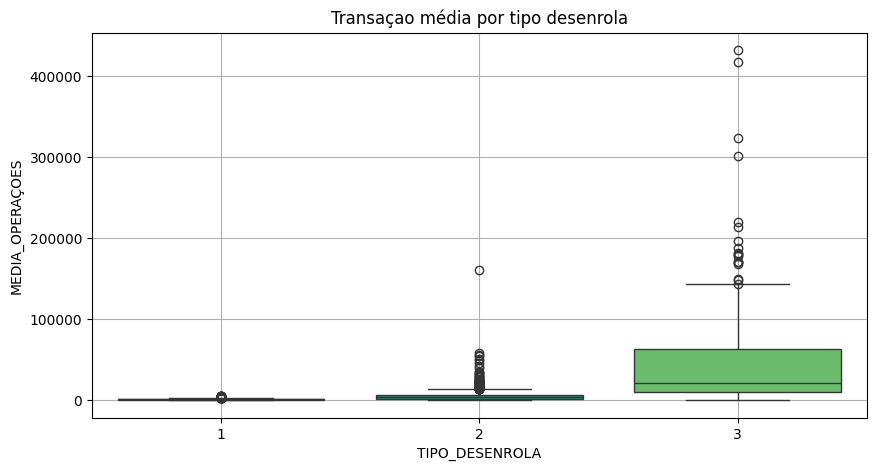

In [30]:
plt.figure(figsize=(10,5))
plt.title('Transaçao média por tipo desenrola')
sns.boxplot(data=df2, x='TIPO_DESENROLA', y='MEDIA_OPERAÇOES', palette='viridis')
plt.grid()
plt.show()

Média de operaçoes por estado e tipo desenrola

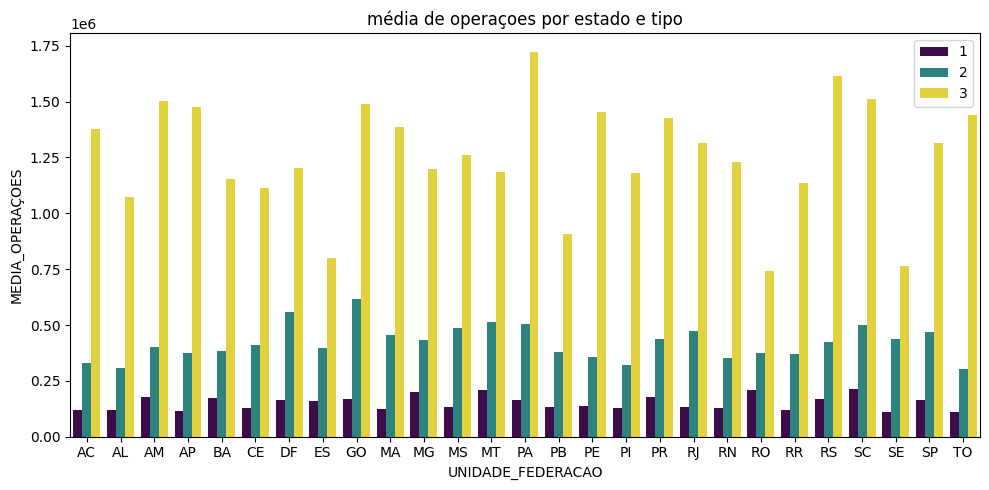

In [52]:
mean_operations = df2.groupby(['UNIDADE_FEDERACAO', 'TIPO_DESENROLA'])['MEDIA_OPERAÇOES'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.title('média de operaçoes por estado e tipo')
sns.barplot(data=mean_operations, x='UNIDADE_FEDERACAO', y='MEDIA_OPERAÇOES', hue='TIPO_DESENROLA', palette='viridis')
plt.tight_layout()
plt.legend()
plt.show()


Nesse grafico, vemos predominancia do tipo 3 do desenrola em todos os estados. 

Relaçao volume de operaçoes por estado e tipo de transaçao 

In [32]:
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES,MEDIA_OPERAÇOES
DATA_BASE,,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10,10014.021831
2023-09-01,2,AC,10045,BRADESCO,17,94097.52,5535.148235
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79,5398.398571
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66,3017.447073
2023-09-01,2,AC,51884,INTER,4,12306.86,3076.715000
...,...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,403555.07,33629.589167
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,17259.94,8629.970000
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,168618.00,24088.285714


Qual é o volume de operaçoes e seus tipos por estado?

<Axes: xlabel='UNIDADE_FEDERACAO', ylabel='VOLUME_OPERACOES'>

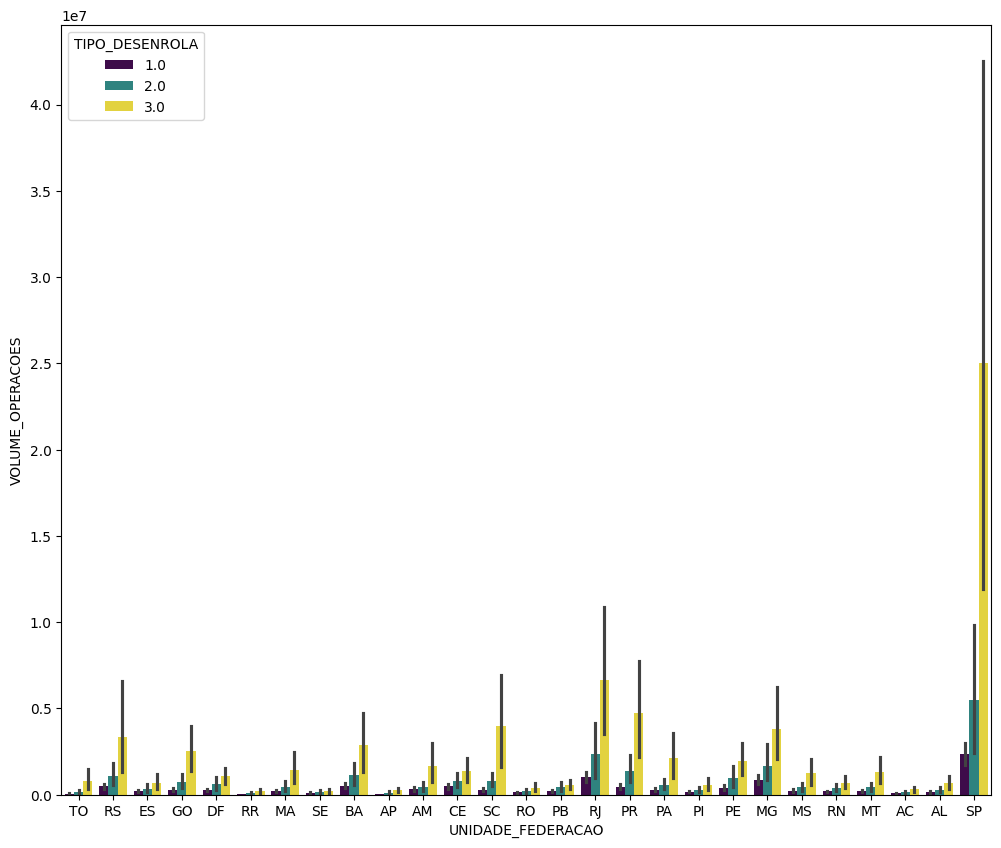

In [53]:
type_volumn_state = df2.groupby(['UNIDADE_FEDERACAO', 'VOLUME_OPERACOES'])['TIPO_DESENROLA'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,10))
sns.barplot(data=type_volumn_state, y='VOLUME_OPERACOES', x='UNIDADE_FEDERACAO', hue='TIPO_DESENROLA', palette='viridis' )

São Paulo, sem nenhuma novidade, apresenta maior volume de operaçoes entre os demais estados. Destacando-se pelo tipo 3 de operaçao. 